In [1]:
file="SP1_2018"
risky=True
money=1

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("../../data/Dataset2/"+file+".csv")

In [4]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,17/08/2018,Betis,Levante,0,3,A,0,1,A,...,2.06,20,-0.75,1.89,1.85,2.07,2.00,1.59,4.42,5.89
1,SP1,17/08/2018,Girona,Valladolid,0,0,D,0,0,D,...,1.71,20,-0.75,2.06,2.01,1.90,1.85,1.76,3.57,5.62
2,SP1,18/08/2018,Barcelona,Alaves,3,0,H,0,0,D,...,3.18,19,-2.50,1.95,1.91,2.00,1.95,1.10,11.85,32.17
3,SP1,18/08/2018,Celta,Espanol,1,1,D,0,1,A,...,1.76,18,-0.75,2.26,2.18,1.74,1.71,2.18,3.26,3.85
4,SP1,18/08/2018,Villarreal,Sociedad,1,2,A,1,1,D,...,1.81,18,-0.25,1.76,1.74,2.23,2.14,2.32,3.21,3.53


In [5]:
date=data[["Date"]]

In [6]:
week_numbers=[]

In [7]:
from datetime import datetime
def date_to_week(row):

    date=row.values[1]


    datetime_object = datetime.strptime(str(date), '%d/%m/%Y')
    extractedWeek= datetime_object.isocalendar()[1]
    if(extractedWeek not in week_numbers):
        week_numbers.append(extractedWeek)
    return week_numbers.index(extractedWeek)



In [8]:
data["Week"]=data.apply(date_to_week, axis = 1)

In [9]:
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Week
0,SP1,17/08/2018,Betis,Levante,0,3,A,0,1,A,...,20,-0.75,1.89,1.85,2.07,2.00,1.59,4.42,5.89,0
1,SP1,17/08/2018,Girona,Valladolid,0,0,D,0,0,D,...,20,-0.75,2.06,2.01,1.90,1.85,1.76,3.57,5.62,0
2,SP1,18/08/2018,Barcelona,Alaves,3,0,H,0,0,D,...,19,-2.50,1.95,1.91,2.00,1.95,1.10,11.85,32.17,0
3,SP1,18/08/2018,Celta,Espanol,1,1,D,0,1,A,...,18,-0.75,2.26,2.18,1.74,1.71,2.18,3.26,3.85,0
4,SP1,18/08/2018,Villarreal,Sociedad,1,2,A,1,1,D,...,18,-0.25,1.76,1.74,2.23,2.14,2.32,3.21,3.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,18/05/2019,Levante,Ath Madrid,2,2,D,2,0,H,...,18,0.50,1.91,1.87,2.04,1.99,4.34,4.10,1.81,34
376,SP1,18/05/2019,Sevilla,Ath Bilbao,2,0,H,1,0,H,...,19,-1.00,2.70,2.60,1.60,1.53,2.17,3.08,4.15,34
377,SP1,18/05/2019,Valladolid,Valencia,0,2,A,0,1,A,...,20,1.50,1.78,1.74,2.20,2.13,8.01,5.13,1.40,34
378,SP1,19/05/2019,Eibar,Barcelona,2,2,D,2,2,D,...,19,0.50,2.03,1.98,1.92,1.88,4.96,4.55,1.65,34


In [10]:
data = data[["HomeTeam", "AwayTeam", "FTR", "B365H", "B365D", "B365A", "Week"]]

In [11]:
def find_results(row, risky,money):
    global team_results
    home = row["HomeTeam"]
    away = row["AwayTeam"]
    res = row["FTR"]
    oddsH = row["B365H"]
    oddsD = row["B365D"]
    oddsA = row["B365A"]
    

    if(risky):    
        pred_index = np.array([oddsH, oddsD, oddsA]).argmax()
    else:
        pred_index = np.array([oddsH, oddsD, oddsA]).argmin()
    pred = np.array(["H", "D", "A"])[pred_index]
    
    if res == pred:
        return np.array([oddsH, oddsD, oddsA])[pred_index]*money
    else:
        return 0

In [12]:
data["Return"]=data.apply(find_results, args=(risky,money), axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data.head(60)

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Week,Return
0,Betis,Levante,A,1.66,4.00,5.00,0,5.00
1,Girona,Valladolid,D,1.75,3.60,5.00,0,0.00
2,Barcelona,Alaves,H,1.11,10.00,21.00,0,0.00
3,Celta,Espanol,D,1.85,3.50,4.50,0,0.00
4,Villarreal,Sociedad,A,2.04,3.40,3.80,0,3.80
5,Eibar,Huesca,A,1.66,3.75,5.50,0,5.50
6,Real Madrid,Getafe,H,1.20,7.00,13.00,0,0.00
7,Vallecano,Sevilla,A,3.25,3.60,2.14,0,0.00
8,Ath Bilbao,Leganes,H,1.75,3.30,5.50,1,0.00
9,Valencia,Ath Madrid,D,3.00,3.20,2.50,1,3.20


In [14]:
data=data[["Week","Return"]]

In [15]:
final = pd.DataFrame(columns= ["Count","Input"])

In [16]:
data.head()

,Week,Return
0,0,5.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,3.8


In [17]:
final=data.groupby(["Week"],as_index=False).count()
final.columns =["Week","Input"]
final["Input"]=final["Input"]*money

In [18]:
final["Output"]=data.groupby(["Week"]).sum()

In [19]:
final

,Week,Input,Output
0,0,8,14.30
1,1,10,9.70
2,2,11,11.50
3,3,9,10.60
4,4,11,3.60
5,5,19,32.43
6,6,11,21.85
7,7,9,33.20
8,8,12,3.30
9,9,9,11.00


In [20]:
final["Return"]=final["Output"]-final["Input"]

In [21]:
final.head()

,Week,Input,Output,Return
0,0,8,14.3,6.3
1,1,10,9.7,-0.3
2,2,11,11.5,0.5
3,3,9,10.6,1.6
4,4,11,3.6,-7.4


In [22]:
final["Return"]=final["Return"].cumsum()

In [23]:
risky= "_risky" if risky else ""

In [25]:
final=final[["Week","Return"]]

In [26]:
final

,Week,Return
0,0,6.30
1,1,6.00
2,2,6.50
3,3,8.10
4,4,0.70
5,5,14.13
6,6,24.98
7,7,49.18
8,8,40.48
9,9,42.48


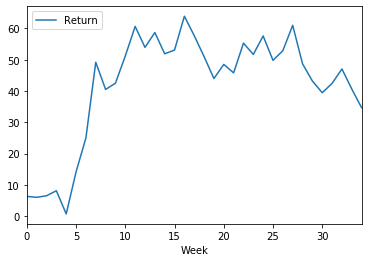

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

final.plot(kind='line',x='Week',y='Return',ax=ax)


plt.show()

In [28]:
risky= "_risky" if risky else ""

In [29]:
# final.to_csv("../data/Computed/AccumulatingChart/"+file+"_"+str(money)+risky+".csv", index=False)

In [30]:
risky

'_risky'

In [31]:
final1=final

In [ ]:
final2=final

In [ ]:
result = pd.merge(final1, final2, on='Week')

In [ ]:
result